In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Reading Data

In [3]:
df = pd.read_csv('../Dataset/NSL_new.csv')

In [4]:
df = df.sample(n=4000)

In [5]:
X = df.drop(['label'], axis=1)
y = df['label']

In [6]:
scoring_metrics = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average="micro"),
           'recall' : make_scorer(recall_score, average="micro"), 
           'f1_score' : make_scorer(f1_score, average="micro")}

In [7]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
124969,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,satan
102098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
59209,0,43,129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
48430,0,978,329,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
25335,0,105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal


In [8]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
124969,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
59209,0,43,129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48430,0,978,329,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
25335,0,105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
y.head()

124969      satan
102098    neptune
59209      normal
48430      normal
25335      normal
Name: label, dtype: object

In [10]:
y = y.replace( to_replace =  'normal' , value = 0 )

y = y.replace( to_replace =  'neptune' , value = 1 )
y = y.replace( to_replace =  'back' , value = 1 )
y = y.replace( to_replace =  'land' , value = 1 )
y = y.replace( to_replace =  'pod' , value = 1 )
y = y.replace( to_replace =  'smurf' , value = 1 )
y = y.replace( to_replace =  'teardrop' , value = 1 )
y = y.replace( to_replace =  'mailbomb' , value = 1 )
y = y.replace( to_replace =  'apache2' , value = 1 )
y = y.replace( to_replace =  'processtable' , value = 1 )
y = y.replace( to_replace =  'udpstorm' , value = 1 )
y = y.replace( to_replace =  'worm' , value = 1 )

y = y.replace( to_replace =  'ipsweep' , value = 2 )
y = y.replace( to_replace =  'nmap' , value = 2 )
y = y.replace( to_replace =  'portsweep' , value = 2 )
y = y.replace( to_replace =  'satan' , value = 2 )
y = y.replace( to_replace =  'mscan' , value = 2 )
y = y.replace( to_replace =  'saint' , value = 2 )

y = y.replace( to_replace =  'ftp_write' , value = 3 )
y = y.replace( to_replace =  'guess_passwd' , value = 3 )
y = y.replace( to_replace =  'imap' , value = 3)
y = y.replace( to_replace =  'multihop' , value = 3 )
y = y.replace( to_replace =  'phf' , value = 3 )
y = y.replace( to_replace =  'spy' , value = 3 )
y = y.replace( to_replace =  'warezclient' , value = 3 )
y = y.replace( to_replace =  'warezmaster' , value = 3 )
y = y.replace( to_replace =  'sendmail' , value = 3 )
y = y.replace( to_replace =  'snmpgetattack' , value = 3 )
y = y.replace( to_replace =  'snmpguess' , value = 3 )
y = y.replace( to_replace =  'xlock' , value = 3 )
y = y.replace( to_replace =  'xsnoop' , value = 3 )
y = y.replace( to_replace =  'httptunnel' , value = 3 )

y = y.replace( to_replace =  'buffer_overflow' , value = 4 )
y = y.replace( to_replace =  'loadmodule' , value = 4 )
y = y.replace( to_replace =  'perl' , value = 4 )
y = y.replace( to_replace =  'rootkit' , value = 4 )
y = y.replace( to_replace =  'ps' , value = 4 )
y = y.replace( to_replace =  'sqlattack' , value = 4  )
y = y.replace( to_replace =  'xterm' , value = 4 )

y = y.replace( to_replace =  'unknown' , value = 5 )

In [11]:
y.head()

124969    2
102098    1
59209     0
48430     0
25335     0
Name: label, dtype: int64

# Principle Component Analysis (PCA)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [30]:
#normalizing the data
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
#Fitting the PCA algorithm with our Data
pca = PCA(n_components=7)
principalComponents = pca.fit(data_rescaled)
df_pca  = pca.fit_transform(data_rescaled)

In [32]:
principalComponents

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

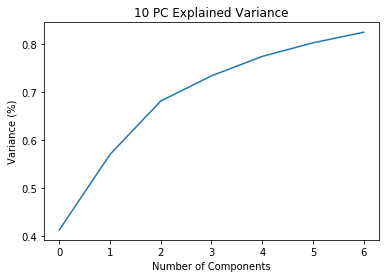

In [33]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(principalComponents.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('10 PC Explained Variance')
plt.show()

In [34]:
# Store as dataframe and print
df_pca = pd.DataFrame(df_pca )
print(df_pca.shape)  #> (3147, 784)
df_pca.round(2).head()

(4000, 7)


,0,1,2,3,4,5,6
0,-0.04,0.60,1.39,-0.22,0.57,-0.12,0.37
1,1.94,-0.56,-0.03,0.03,-0.11,-0.36,-0.05
2,-0.86,0.07,1.28,-1.09,-0.38,-0.17,-0.44
3,-0.89,-0.18,-0.05,0.55,0.77,-0.11,-0.68
4,-0.47,0.30,1.13,-0.74,0.14,0.86,0.00


In [35]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

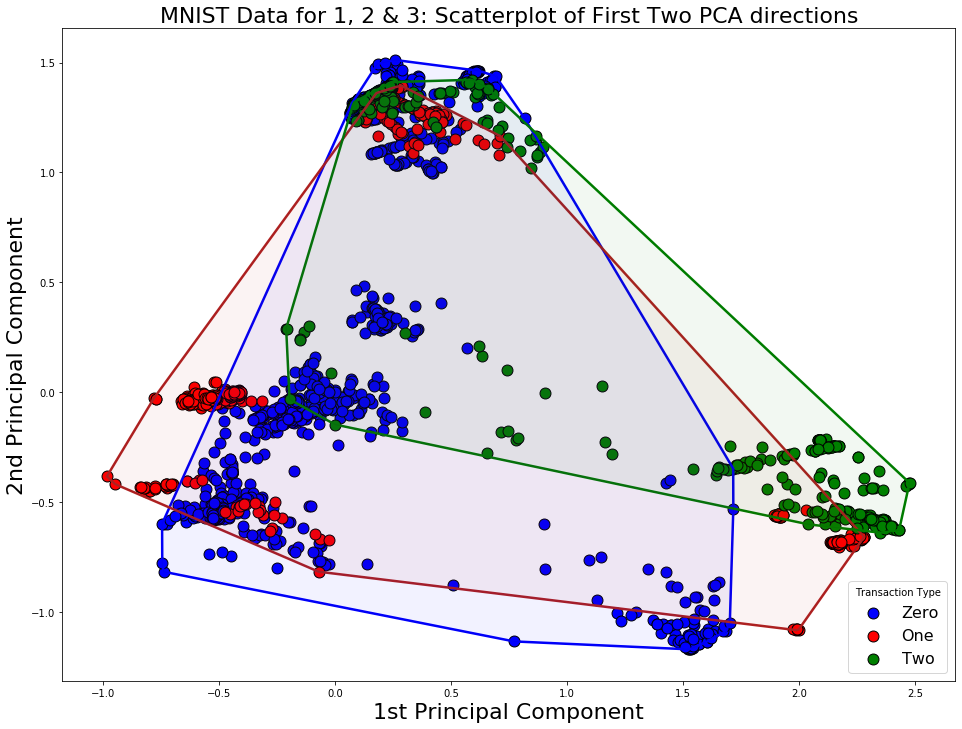

In [37]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = y==0;
rows_1 = y==1; 
rows_2 = y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("MNIST Data for 1, 2 & 3: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

In [40]:
randomForestScore = cross_validate(randomForestModel, df_pca, y, cv=4, scoring=scoring_metrics, verbose=3 ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   21.1s finished


In [42]:
randomForestScore = pd.DataFrame(randomForestScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [45]:
randomForestScore.to_csv('NSL_RandomForest_PCA10_scores.csv')

In [46]:
randomForestScore

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,0.245114,0.105973,0.885115,0.885629,0.885115,0.885629,0.885115,0.885629,0.885115,0.885629
1,0.243115,0.101977,0.879121,0.883294,0.879121,0.883294,0.879121,0.883294,0.879121,0.883294
2,0.254210,0.091895,0.877000,0.885667,0.877000,0.885667,0.877000,0.885667,0.877000,0.885667
3,0.240117,0.114969,0.874749,0.875416,0.874749,0.875416,0.874749,0.875416,0.874749,0.875416


In [47]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [48]:
rf_parameters={'n_estimators' : range(80,200,20),'max_depth': range(1,20,3), 'min_samples_split': np.arange(0.1,1,0.1)}

In [49]:
rf2 = RandomForestClassifier()

In [50]:
dlGrid = GridSearchCV(rf2, rf_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=3)

In [51]:
dlGrid.fit(X, y)

Fitting 3 folds for each of 378 candidates, totalling 1134 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1134 out of 1134 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(80, 200, 20), 'max_depth': range(1, 20, 3), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average=micro), 'recall': make_scorer(recall_score, average=micro), 'f1_score': make_scorer(f1_score, average=m

In [52]:
dtGridScores = pd.DataFrame(dlGrid.cv_results_)
dtGridScores.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,split1_test_f1_score,split2_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_train_f1_score,split1_train_f1_score,split2_train_f1_score,mean_train_f1_score,std_train_f1_score
0,0.127259,0.031333,0.081287,0.010137,1,0.1,80,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.867316,0.859715,...,0.859715,0.857464,0.86150,0.004216,109,0.858590,0.862017,0.863142,0.861250,0.001936
1,0.209545,0.028577,0.115936,0.007476,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.867316,0.859715,...,0.859715,0.856714,0.86125,0.004463,138,0.858215,0.862017,0.863517,0.861250,0.002232
2,0.272197,0.050546,0.132753,0.020984,1,0.1,120,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.866567,0.859715,...,0.859715,0.857464,0.86125,0.003871,138,0.858590,0.862392,0.863517,0.861500,0.002108
3,0.321972,0.027603,0.275551,0.030926,1,0.1,140,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.867316,0.859715,...,0.859715,0.856714,0.86125,0.004463,138,0.858215,0.862392,0.863142,0.861250,0.002168
4,0.406122,0.025435,0.205899,0.036603,1,0.1,160,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.866567,0.859715,...,0.859715,0.856714,0.86100,0.004124,200,0.858215,0.862392,0.863517,0.861375,0.002281


In [53]:
dt3=dlGrid.best_estimator_

In [54]:
dtFinalScore = cross_validate(dt3, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished


In [55]:
dtFinalScore = pd.DataFrame(dtFinalScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,0.566636,0.145738,0.969031,0.963988,0.969031,0.963988,0.969031,0.963988,0.969031,0.963988
1,0.536643,0.163739,0.946054,0.960654,0.946054,0.960654,0.946054,0.960654,0.946054,0.960654
2,0.540642,0.172732,0.956000,0.965000,0.956000,0.965000,0.956000,0.965000,0.956000,0.965000
3,0.569632,0.185717,0.965932,0.967688,0.965932,0.967688,0.965932,0.967688,0.965932,0.967688


In [57]:
dtFinalScore['test_accuracy'].mean()

0.9592541947030925

In [56]:
randomForestScore.to_csv('NSL_RandomForest_PCA10_bestEstimator.csv')

# Neural Network

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
mlpModel = MLPClassifier()

In [60]:
mlpScore=cross_validate(mlpModel, df_pca, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s finished


In [61]:
mlpModel

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
mlpScore = pd.DataFrame(mlpScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [63]:
mlpScore.to_csv('NSL_MLP_PCA10_scores.csv')

In [64]:
nLayers=[
    (4),
    (7),
    (10), #one layer of 10 nodes
    (13),
    (17),
    (20),
    (30),
    (50),
    (80),
    (100),
    (120),
    (140),
    (180),
    (220),
    (10, 10), #two layers, 10 nodes each
    (20, 20), #two layers, 20 nodes each
    (30, 30),
    (50, 50),
    (80, 80),
    (100, 100),
    (150, 150),
    (10, 10, 10), #three layers, 10 nodes each
    (20, 20, 20),
    (30, 30, 30),
    (50, 50, 50),
    (80, 80, 80),
]

In [65]:
mlp_parameters = {
    'hidden_layer_sizes': nLayers,
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [66]:
X_sample=X.sample(frac=0.2, random_state=1)
y_sample=y.sample(frac=0.2, random_state=1)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from sklearn.neural_network import MLPClassifier
mlpModel2 = MLPClassifier()

In [69]:
mlp_grid = GridSearchCV(mlpModel2, mlp_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=3)


In [70]:
mlp_grid.fit(X_sample, y_sample)

Fitting 3 folds for each of 312 candidates, totalling 936 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 936 out of 936 | elapsed:  1.4min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [4, 7, 10, 13, 17, 20, 30, 50, 80, 100, 120, 140, 180, 220, (10, 10), (20, 20), (30, 30), (50, 50), (80, 80), (100, 100), (150, 150), (10, 10, 10), (20, 20, 20), (30, 30, 30), (50, 50, 50), (80, 80, 80)], 'solver': ['sgd', 'adam'], 'alpha': [0.001, 0.01, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn

In [71]:
mlpGridScores=pd.DataFrame(mlp_grid.cv_results_)
mlpGridScores.head()
# mlpGridScores.to_csv('NSL_ANN_PCA10_gridsearch.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_accuracy,...,split1_test_f1_score,split2_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_train_f1_score,split1_train_f1_score,split2_train_f1_score,mean_train_f1_score,std_train_f1_score
0,0.204995,0.231228,0.011663,0.001244,0.001,4,constant,sgd,"{'alpha': 0.001, 'hidden_layer_sizes': 4, 'lea...",0.119403,...,0.543071,0.109434,0.2575,0.202160,309,0.112782,0.542214,0.112150,0.255715,0.202585
1,0.568443,0.062399,0.017670,0.011570,0.001,4,constant,adam,"{'alpha': 0.001, 'hidden_layer_sizes': 4, 'lea...",0.511194,...,0.535581,0.596226,0.5475,0.035714,241,0.518797,0.521576,0.588785,0.543053,0.032358
2,0.297161,0.139446,0.012329,0.004024,0.001,4,adaptive,sgd,"{'alpha': 0.001, 'hidden_layer_sizes': 4, 'lea...",0.544776,...,0.112360,0.852830,0.5025,0.303403,271,0.569549,0.110694,0.844860,0.508368,0.302828
3,0.413791,0.187239,0.010329,0.000472,0.001,4,adaptive,adam,"{'alpha': 0.001, 'hidden_layer_sizes': 4, 'lea...",0.869403,...,0.677903,0.558491,0.7025,0.128077,207,0.889098,0.718574,0.571963,0.726545,0.129592
4,0.272453,0.165227,0.012165,0.003420,0.001,7,constant,sgd,"{'alpha': 0.001, 'hidden_layer_sizes': 7, 'lea...",0.559701,...,0.846442,0.860377,0.7550,0.138731,198,0.593985,0.846154,0.861682,0.767274,0.122698


In [72]:
mlpFinalModel = mlp_grid.best_estimator_
mlp_grid.best_params_

{'alpha': 0.05,
 'hidden_layer_sizes': 50,
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [73]:
mlpFinalScore=cross_validate(mlpFinalModel, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s finished


In [74]:
mlpFinalScore = pd.DataFrame(mlpFinalScore)
mlpFinalScore.to_csv('NSL_ANN_PCA10_bestEstimator.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [75]:
mlpFinalScore['test_accuracy'].mean()

0.9557544324413062

# Decision Trees

In [84]:
from sklearn.tree import tree

In [85]:
dt=tree.DecisionTreeClassifier()

In [86]:
dtScore = cross_validate(dt, df_pca, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [90]:
dtScore = pd.DataFrame(dtScore)
dtScore.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,0.023984,0.005997,0.979021,1.0,0.979021,1.0,0.979021,1.0,0.979021,1.0
1,0.024984,0.003998,0.978022,1.0,0.978022,1.0,0.978022,1.0,0.978022,1.0
2,0.024985,0.004997,0.975000,1.0,0.975000,1.0,0.975000,1.0,0.975000,1.0
3,0.022985,0.006997,0.969940,1.0,0.969940,1.0,0.969940,1.0,0.969940,1.0


In [91]:
dtScore.to_csv('NSL_dtScore_PCA10_scores.csv')

In [92]:
dt_parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

In [94]:
dt2 = tree.DecisionTreeClassifier()

In [95]:
dlGrid = GridSearchCV(dt2, dt_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=4)

In [96]:
dlGrid.fit(X, y)

Fitting 4 folds for each of 250 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.1s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average=micro), 'recall': make_scorer(recall_score, average=micro), 'f1_score': make_scorer(f1_score, average=micro)},
       verbose=3)

In [97]:
dtGridScores = pd.DataFrame(dlGrid.cv_results_)
dtGridScores.head()
dtGridScores.to_csv('NSL_DT_PCA10_GridSearch.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

In [98]:
dt3=dlGrid.best_estimator_
dlGrid.best_params_

{'max_depth': 19, 'min_samples_split': 10}

In [99]:
dtFinalScore = cross_validate(dt3, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


In [101]:
dtFinalScore = pd.DataFrame(dtFinalScore)
dtFinalScore.to_csv('NSL_DT_PCA10_bestEstimator.csv')
dtFinalScore['test_precision'].mean()

0.9879984804774384

# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()

In [112]:
k_range = list(range(1, 101, 5))

In [113]:
param_dict = dict(n_neighbors=k_range)

In [114]:
grid = GridSearchCV(knn, param_dict, cv=4, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1)

In [115]:
grid.fit(df_pca, y)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.2s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average=micro), 'recall': make_scorer(recall_score, average=micro), 'f1_score': make_scorer(f1_score, average=micro)},
       verbose=3)

In [116]:
knnScore = pd.DataFrame(grid.cv_results_)
knnScore.to_csv('NSL_KNN_PCA10_GridSearch.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

In [119]:
knn2=grid.best_estimator_
grid.best_params_

{'n_neighbors': 1}

In [120]:
knnFinalScore = cross_validate(knn2, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished


In [121]:
knnFinalScore = pd.DataFrame(knnFinalScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [122]:
knnFinalScore.to_csv('NSL_KNN_PCA_bestEstimator.csv')

In [123]:
pd.DataFrame(linearScore).mean()

NameError: name 'linearScore' is not defined

In [181]:
pd.DataFrame(mlpScore).mean()

fit_time         220.265742
score_time         0.240229
test_accuracy      0.979567
dtype: float64

In [199]:
knnFinalScore = pd.DataFrame(knnFinalScore)
# knnFinalScore.to_csv('NSL_KNN_Scores')

# All Results

In [125]:
allResults=pd.concat([
    mlpScore.mean(),
    dtFinalScore.mean(),
    knnFinalScore.mean(),
    randomForestScore.mean()
], axis=1)
allResults

,0,1,2
fit_time,3.364814,0.035730,0.047722
score_time,0.013500,0.010745,0.751545
test_accuracy,0.975247,0.987998,0.967251
train_accuracy,0.981001,0.997833,1.000000
test_precision,0.975247,0.987998,0.967251
train_precision,0.981001,0.997833,1.000000
test_recall,0.975247,0.987998,0.967251
train_recall,0.981001,0.997833,1.000000
test_f1_score,0.975247,0.987998,0.967251
train_f1_score,0.981001,0.997833,1.000000


In [126]:
allResults.rename(columns={0:'Multi-level Perceptron', 1:'Decision Tree', 2:'KNN' , 3:'Random Forest' },  inplace=True)
allResults

,Multi-level Perceptron,Decision Tree,KNN
fit_time,3.364814,0.035730,0.047722
score_time,0.013500,0.010745,0.751545
test_accuracy,0.975247,0.987998,0.967251
train_accuracy,0.981001,0.997833,1.000000
test_precision,0.975247,0.987998,0.967251
train_precision,0.981001,0.997833,1.000000
test_recall,0.975247,0.987998,0.967251
train_recall,0.981001,0.997833,1.000000
test_f1_score,0.975247,0.987998,0.967251
train_f1_score,0.981001,0.997833,1.000000


# All Results

In [127]:
allResults.to_csv('NSL_PCA10_Final.csv')